In [40]:
import pandas as pd
import numpy as np
from collections import Counter as c
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler

In [41]:
df = pd.read_csv('Final_Data.csv')

In [42]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,99.0,...,38.0,6000.0,3.9,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,4.6,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,4.4,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [43]:
df.tail()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,41.0,9800.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0,0
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,41.0,9800.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0,0
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,41.0,9800.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0,0
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,41.0,9800.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0,0
399,58.0,80.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,131.0,...,41.0,9800.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0,0


In [44]:
y=df['classification']
df=df.drop("classification",axis=1)

In [45]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.0,...,15.4,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,99.0,...,11.3,38.0,6000.0,3.9,0.0,0.0,0.0,1.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,9.6,31.0,7500.0,4.6,0.0,1.0,0.0,0.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,11.2,32.0,6700.0,4.4,1.0,0.0,0.0,0.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,11.6,35.0,7300.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,15.7,41.0,9800.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,16.5,41.0,9800.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,15.8,41.0,9800.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,14.2,41.0,9800.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0


In [46]:
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64

In [47]:
X=df.copy()
df.size

9600

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [51]:
model = LogisticRegression()
X_train.shape

(320, 24)

In [52]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(320, 24)

Model: Logistic Regression
Accuracy: 0.9625
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        24
           1       1.00      0.95      0.97        56

    accuracy                           0.96        80
   macro avg       0.94      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80

Confusion Matrix:


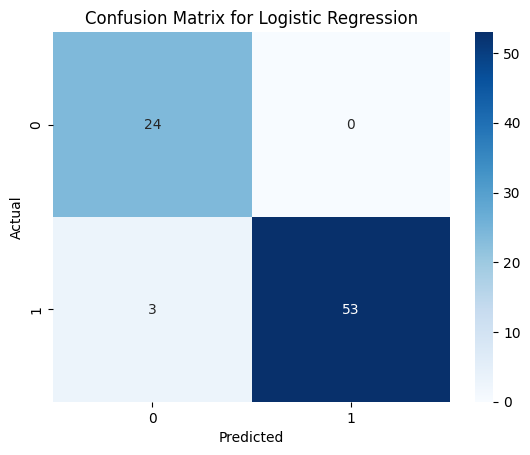

Model: Decision Tree
Accuracy: 0.975
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.96      0.98        56

    accuracy                           0.97        80
   macro avg       0.96      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80

Confusion Matrix:


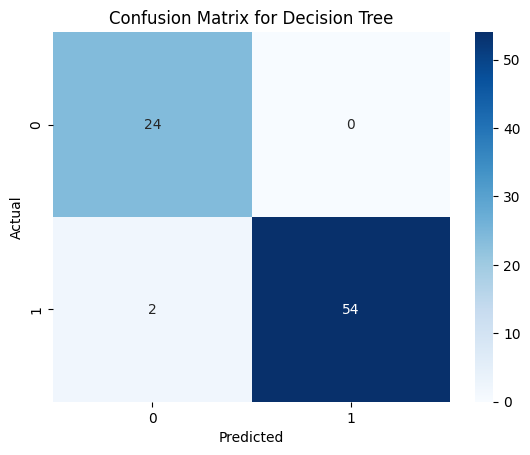

Model: Random Forest
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        56

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix:


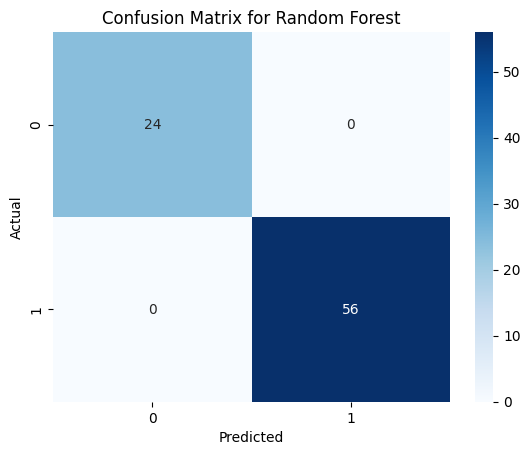

Model: SVM
Accuracy: 0.9625
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        24
           1       1.00      0.95      0.97        56

    accuracy                           0.96        80
   macro avg       0.94      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80

Confusion Matrix:


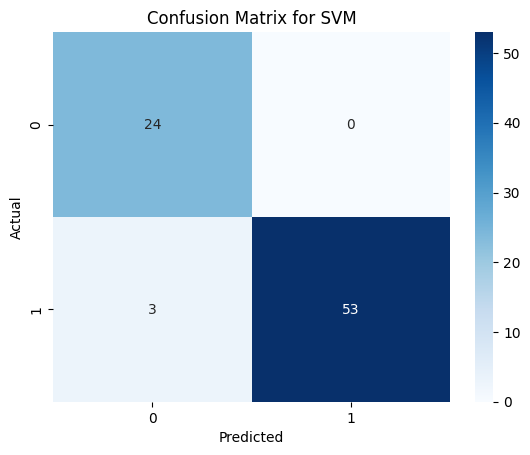

In [53]:
# Initialize the models
logreg = LogisticRegression(max_iter=1000)
dtree = DecisionTreeClassifier()
rforest = RandomForestClassifier()
svm = SVC()

# Train the models
logreg.fit(X_train, y_train)
dtree.fit(X_train, y_train)
rforest.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)
y_pred_dtree = dtree.predict(X_test)
y_pred_rforest = rforest.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluate the models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
predictions = [y_pred_logreg, y_pred_dtree, y_pred_rforest, y_pred_svm]

for model, y_pred in zip(models, predictions):
    print(f"Model: {model}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Logistic regression seems appropriate

In [54]:
# Compare the models
results = {
    'Model': models,
    'Accuracy': [accuracy_score(y_test, y_pred_logreg),
                 accuracy_score(y_test, y_pred_dtree),
                 accuracy_score(y_test, y_pred_rforest),
                 accuracy_score(y_test, y_pred_svm)]
}

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy
0  Logistic Regression    0.9625
1        Decision Tree    0.9750
2        Random Forest    1.0000
3                  SVM    0.9625


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Assuming you have your data prepared (X_train, X_test, y_train, y_test)

# Define the logistic regression model
model = LogisticRegression(max_iter=5000)

# Define the parameter grid for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']  # Solvers to try
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5)  # 5-fold cross-validation

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model and best parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions with the best model on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model performance using metrics (accuracy, precision, etc.)

# Print the best parameters found
print("Best parameters:", best_params)


Best parameters: {'C': 100, 'solver': 'lbfgs'}


(80, 24)
0.975
Confusion Matrix:


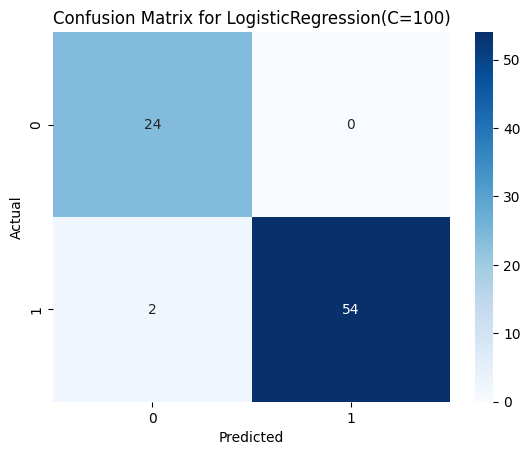

In [56]:
from sklearn.linear_model import LogisticRegression

# Assuming you have your data prepared (X_train, X_test, y_train, y_test)

# Create the logistic regression model with the best parameters
model = LogisticRegression(C=100, solver='lbfgs')

# Fit the model to your training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print(X_test.shape)
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix for {model}")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Evaluate the model performance using metrics (accuracy, precision, etc.)


In [57]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# ... (Get best model and parameters)

# Evaluate the model on the test set
test_score = best_model.score(X_test, y_test)
print("Test accuracy:", test_score)

E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarn

Test accuracy: 0.975


E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarn

In [58]:
# Open a file in write-binary mode
with open('kidney_logistic_regression.pkl', 'wb') as f:
  # Dump the trained model object using pickle.dump
  pickle.dump(model, f)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have your data as X and target variable as y

# Split data into training and testing sets (adjust test_size as needed)


# Define the Random Forest model
rf_model = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [4, 6, 8],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at each leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features considered at each split
}

# Create a RandomizedSearchCV object (adjust n_iter for more exploration)
search = RandomizedSearchCV(rf_model, param_grid, cv=10, n_iter=100, scoring='accuracy')

# Fit the search object (trains with cross-validation)
search.fit(X_train, y_train)

# Get the best model and best parameters
best_model = search.best_estimator_
best_params = search.best_params_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model performance (accuracy in this case)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the best parameters found
print("Best parameters:", best_params)


Accuracy: 1.0
Best parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 8}


E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
310 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
310 fits failed with the following error:
Traceback (most recent call last):
  File "E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "E:\anaconda\envs\tensorflow

In [62]:

# Define the Random Forest model with the best parameters
rf_model2 = RandomForestClassifier(n_estimators=200, min_samples_split=10,
                              min_samples_leaf=2, max_features='log2', max_depth=8)

# Train the model on the training data
rf_model2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model2.predict(X_test)

# Evaluate the model performance

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix_result)

# Classification Report (including precision, recall, F1-score, etc.)
classification_report_result = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_result)

# Additional Scores (you can choose based on your problem)
# - Precision (for each class)
# - Recall (for each class)
# - F1-score (for each class)
# - ROC AUC score (for imbalanced datasets)

# Print additional scores if needed (example: F1-score)
# from sklearn.metrics import f1_score
# f1 = f1_score(y_test, y_pred, average='macro')  # Or 'micro' or weighted average
# print("F1-score (macro):", f1)
print(X_test.shape)
print(y_test.shape)

Accuracy: 1.0
Confusion Matrix:
 [[24  0]
 [ 0 56]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        56

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

(80, 24)
(80,)


In [65]:
grid_search = GridSearchCV(rf_model2, param_grid, cv=10, scoring="accuracy")
grid_search.fit(X_train, y_train)

# ... (Get best model and parameters)

# Evaluate the model on the test set
test_score = best_model.score(X_test, y_test)
print("Test accuracy:", test_score)

Test accuracy: 1.0


E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
810 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "E:\anaconda\envs\tensorflow

In [67]:
with open('kidney_random_forest.pkl', 'wb') as f:
  # Dump the trained model object using pickle.dump
  pickle.dump(model, f)

Random forest likely overfitting even after cv

In [21]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for GridSearchCV
param_grid = {
    "max_depth": [2, 3, 4, 5],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt"]  # Different options for feature selection
}

# Create the decision tree model
dtree = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring="accuracy")

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters
print("Best parameters:", best_params)

# Use the best model for prediction
# ...


Best parameters: {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "E:\anaconda\envs\tensorflow\

In [36]:

dt=DecisionTreeClassifier(max_depth=4,min_samples_leaf=1, min_samples_split= 2)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [37]:
y_pred=dt.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

1.0
Confusion Matrix:


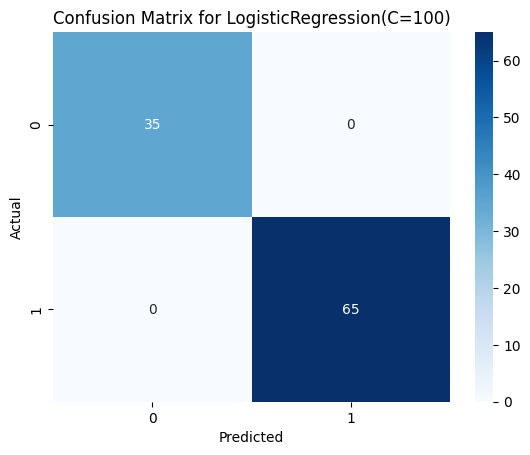

In [38]:
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix for {model}")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [39]:
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# ... (Get best model and parameters)

# Evaluate the model on the test set
test_score = best_model.score(X_test, y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.65


E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "E:\anaconda\envs\tensorflow\

Low accuracy after cross validation--Decision tree

In [70]:

# Define the parameter grid for GridSearchCV
param_grid = {
    "C": [0.1, 1, 10],  # Regularization parameter
    "kernel": ["linear", "rbf"],  # Kernel function
    "gamma": [0.01, 0.1, 1],  # Kernel coefficient (for rbf)
}

# Create the SVM model
svm_model = SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring="accuracy")

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters
print("Best parameters:", best_params)

# Use the best model for prediction
# ... (Similar to decision tree example)


Best parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}


0.9625
Confusion Matrix:


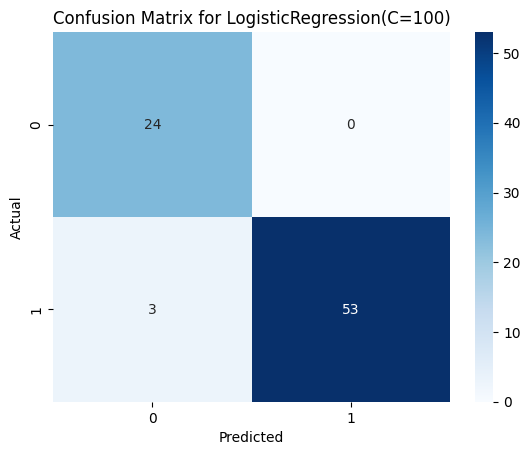

In [71]:
svm_model = SVC(C=1,gamma=0.01,kernel="linear")
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix for {model}")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [73]:
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# ... (Get best model and parameters)

# Evaluate the model on the test set
test_score = best_model.score(X_test, y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.7


E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
#Not as accurate as logistic regreession.

Conclusion:
Logistic regression is the best model for this type of Data and scenario